In [1]:
import sys
import importlib
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import sys
import awkward as ak
import scipy
import ROOT
sys.path.insert(0,"../")


Welcome to JupyROOT 6.30/07


In [2]:
sys.path.insert(0,"../python/HNL_Plotting_HelperFunctions")
import MuonSystemReader
import ABCD_FirstStudy_Helper
import Processing_Helpers
import analysis_helpers


/cvmfs/cms.cern.ch/el9_amd64_gcc12/lcg/root/6.30.07-024df6516c17fd2edef848a927a788f1/lib/ROOT/_facade.py:154: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  return _orig_ihook(name, *args, **kwds)
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, w

In [3]:
HNL_2GeV_10ctau_path = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/signal_tau_mN2_ct1000/HNL_tau_mN_2_ctau_1000/normalized/HNL_tau_mN_2_ctau_1000.root"
signal_events  = MuonSystemReader.loadTree_nanoFactory(HNL_2GeV_10ctau_path)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/dask_awkward/lib/structure.py:911: UserWarning: Please ensure that dask.awkward<nCscRechitClusters, npartitions=1>
        is partitionwise-compatible with dask.awkward<getitem, npartitions=1>
        (e.g. counts comes from a dak.num(array, axis=1)),
        otherwise this unflatten operation will fail when computed!
  warnings.warn(


In [3]:
### NOTE: for this sample in data, the tau energy branch is messed up ###
data_path_base = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_allChannels/"

data_samples = ["Muon0-Run2024B-PromptReco-v1",
    "Muon0-Run2024C-PromptReco-v1",
    "Muon0-Run2024D-PromptReco-v1",
    "Muon0-Run2024E-PromptReco-v1",
    "Muon0-Run2024E-PromptReco-v2",
    "Muon0-Run2024F-PromptReco-v1",
    "Muon0-Run2024G-PromptReco-v1",
    "Muon0-Run2024H-PromptReco-v1",
    "Muon0-Run2024I-PromptReco-v1",
    "Muon0-Run2024I-PromptReco-v2",
    "Muon1-Run2024B-PromptReco-v1",
    "Muon1-Run2024C-PromptReco-v1",
    "Muon1-Run2024D-PromptReco-v1",
    "Muon1-Run2024E-PromptReco-v1",
    "Muon1-Run2024E-PromptReco-v2",
    "Muon1-Run2024F-PromptReco-v1",
    "Muon1-Run2024G-PromptReco-v1",
    "Muon1-Run2024H-PromptReco-v1",
    "Muon1-Run2024I-PromptReco-v1",
    "Muon1-Run2024I-PromptReco-v2"
    ]

data_events_list = [data_path_base+sample+"/normalized/"+sample+"_goodLumi.root" for sample in data_samples]
data_events  = MuonSystemReader.loadTree_nanoFactory(data_events_list)


/uscms/home/amalbert/.local/lib/python3.9/site-packages/dask_awkward/lib/structure.py:911: UserWarning: Please ensure that dask.awkward<nCscRechitClusters, npartitions=20>
        is partitionwise-compatible with dask.awkward<getitem, npartitions=20>
        (e.g. counts comes from a dak.num(array, axis=1)),
        otherwise this unflatten operation will fail when computed!
  warnings.warn(


In [10]:
importlib.reload(MuonSystemReader)
importlib.reload(ABCD_FirstStudy_Helper)
#importlib.reload(Processing_Helpers)

<module 'ABCD_FirstStudy_Helper' from '/uscms_data/d3/amalbert/el9_work/CMSSW_14_1_0_pre4/src/run3_llp_analyzer/HNL_Plotting_Scripts/../python/HNL_Plotting_HelperFunctions/ABCD_FirstStudy_Helper.py'>

### Hotspot check with no DNN/Station12 Veto

In [11]:
#hotspot check no DNN/NStation10
clusterEta_allCutsDNN0, clusterPhi_allCutsDNN0 = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelectionsDNN(data_events, passID = 'tauIsLoose', failID = 'tauIsMedium', blind=False, DNN_cut=0, hotspotCheck=True)
clusterEta_allCutsDNN0MT, clusterPhi_allCutsDNN0MT = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelectionsDNN(data_events, passID = 'tauIsMedium', failID = 'tauIsTight', blind=False, DNN_cut=0, hotspotCheck=True)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36119 instead
  warnings.warn(


/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46799 instead
  warnings.warn(
/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-083

In [13]:
from ROOT import gStyle
gStyle.SetOptStat(0)

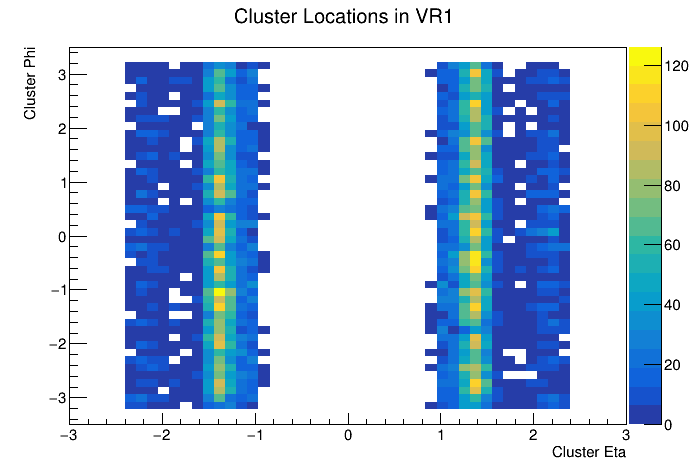

In [16]:
h2d_VR1 = ROOT.TH2D("", "Cluster Locations in VR1;Cluster Eta;Cluster Phi", 50, -3, 3, 50, -3.5, 3.5)
for x, y in zip(clusterEta_allCutsDNN0, clusterPhi_allCutsDNN0):
    h2d_VR1.Fill(x,y)

c = ROOT.TCanvas()
h2d_VR1.Draw("profcolz")
c.Draw()

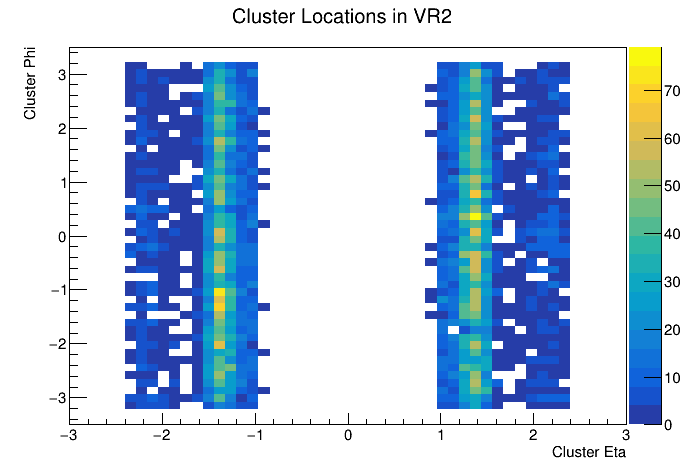

In [17]:
h2d_VR1 = ROOT.TH2D("", "Cluster Locations in VR2;Cluster Eta;Cluster Phi", 50, -3, 3, 50, -3.5, 3.5)
for x, y in zip(clusterEta_allCutsDNN0MT, clusterPhi_allCutsDNN0MT):
    h2d_VR1.Fill(x,y)

c = ROOT.TCanvas()
h2d_VR1.Draw("profcolz")
c.Draw()

### Check cluster distributions with station12 veto

In [18]:
#hotspot check no DNN/NStation10
clusterEta_allCutsStationVeto, clusterPhi_allCutsStationVeto = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelectionsDNN(data_events, passID = 'tauIsLoose', failID = 'tauIsMedium', blind=False, hotspotCheck=True)
clusterEta_allCutsStationVetoMT, clusterPhi_allCutsStationVetoMT = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelectionsDNN(data_events, passID = 'tauIsMedium', failID = 'tauIsTight', blind=False, hotspotCheck=True)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46625 instead
  warnings.warn(
/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38383 instead
  warnings.warn(
/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with sci

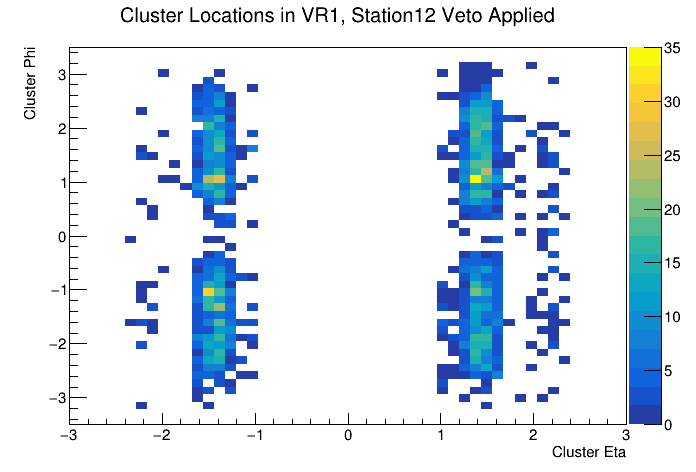

In [19]:
h2d_VR1_StationVeto = ROOT.TH2D("", "Cluster Locations in VR1, Station12 Veto Applied;Cluster Eta;Cluster Phi", 50, -3, 3, 50, -3.5, 3.5)
for x, y in zip(clusterEta_allCutsStationVeto, clusterPhi_allCutsStationVeto):
    h2d_VR1_StationVeto.Fill(x,y)

c = ROOT.TCanvas()
h2d_VR1_StationVeto.Draw("profcolz")
c.Draw()

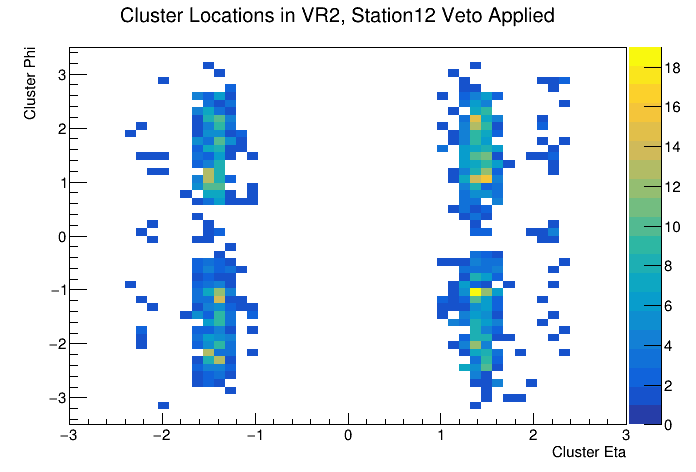

In [21]:
h2d_VR2_StationVeto = ROOT.TH2D("", "Cluster Locations in VR2, Station12 Veto Applied;Cluster Eta;Cluster Phi", 50, -3, 3, 50, -3.5, 3.5)
for x, y in zip(clusterEta_allCutsStationVetoMT, clusterPhi_allCutsStationVetoMT):
    h2d_VR2_StationVeto.Fill(x,y)

c = ROOT.TCanvas()
h2d_VR2_StationVeto.Draw("profcolz")
c.Draw()

### Check cluster distributions with DNN>0.99975 cut

In [24]:
clusterEta_allCutsDNN, clusterPhi_allCutsDNN = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelectionsDNN(data_events, passID = 'tauIsLoose', failID = 'tauIsMedium', blind=False, DNN_cut=0.99975, hotspotCheck=True)
clusterEta_allCutsDNNMT, clusterPhi_allCutsDNNMT = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelectionsDNN(data_events, passID = 'tauIsMedium', failID = 'tauIsTight', blind=False, DNN_cut=0.99975, hotspotCheck=True)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35367 instead
  warnings.warn(


/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44969 instead
  warnings.warn(
/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-083

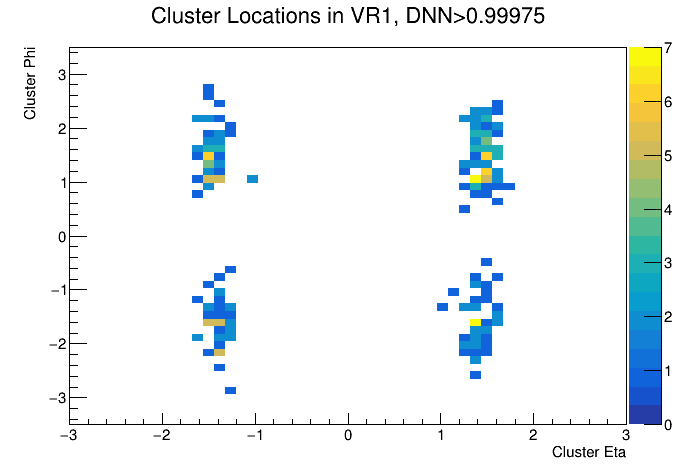

In [25]:
h2d_VR1_DNN = ROOT.TH2D("", "Cluster Locations in VR1, DNN>0.99975;Cluster Eta;Cluster Phi", 50, -3, 3, 50, -3.5, 3.5)
for x, y in zip(clusterEta_allCutsDNN, clusterPhi_allCutsDNN):
    h2d_VR1_DNN.Fill(x,y)

c = ROOT.TCanvas()
h2d_VR1_DNN.Draw("profcolz")
c.Draw()

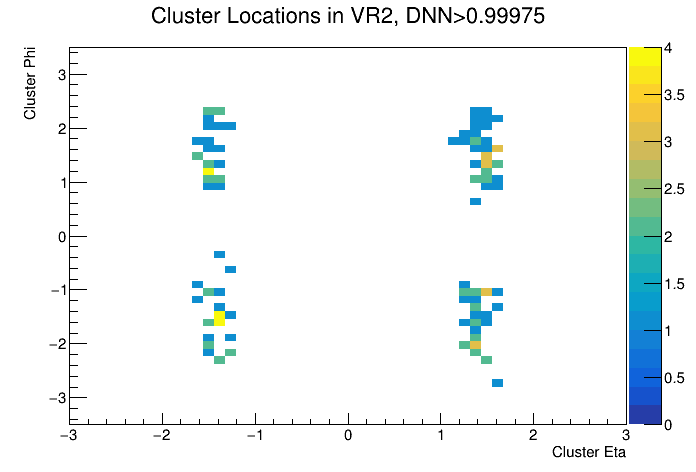

In [26]:
h2d_VR2_DNN = ROOT.TH2D("", "Cluster Locations in VR2, DNN>0.99975;Cluster Eta;Cluster Phi", 50, -3, 3, 50, -3.5, 3.5)
for x, y in zip(clusterEta_allCutsDNNMT, clusterPhi_allCutsDNNMT):
    h2d_VR2_DNN.Fill(x,y)

c = ROOT.TCanvas()
h2d_VR2_DNN.Draw("profcolz")
c.Draw()

### check signal

In [4]:
clusterEta_allCutsDNN0_signal, clusterPhi_allCutsDNN0_signal = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelectionsDNN(signal_events, passID = 'tauIsLoose', failID = 'tauIsMedium', blind=False, DNN_cut=0, hotspotCheck=True)
clusterEta_allCutsStationVeto_signal, clusterPhi_allCutsStationVeto_signal = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelectionsDNN(signal_events, passID = 'tauIsLoose', failID = 'tauIsMedium', blind=False, hotspotCheck=True)
clusterEta_allCutsDNN_signal, clusterPhi_allCutsDNN_signal = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelectionsDNN(signal_events, passID = 'tauIsLoose', failID = 'tauIsMedium', blind=False, DNN_cut=0.99975, hotspotCheck=True)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])

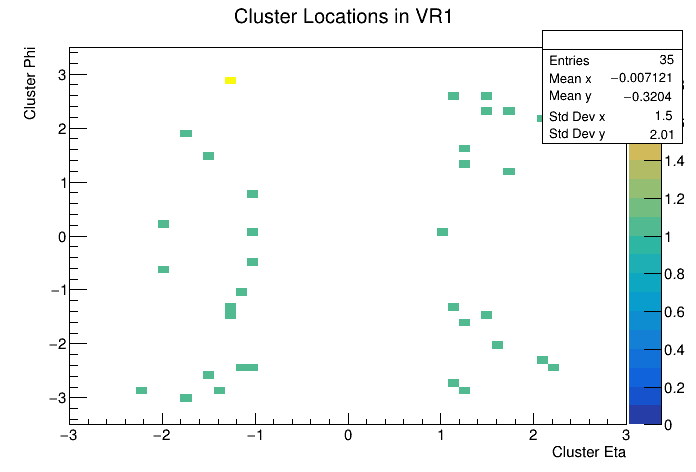

In [5]:
h2d_VR1_signal = ROOT.TH2D("", "Cluster Locations in VR1;Cluster Eta;Cluster Phi", 50, -3, 3, 50, -3.5, 3.5)
for x, y in zip(clusterEta_allCutsDNN0_signal, clusterPhi_allCutsDNN0_signal):
    h2d_VR1_signal.Fill(x,y)

c = ROOT.TCanvas()
h2d_VR1_signal.Draw("profcolz")
c.Draw()

In [ ]:
h2d_VR1_signal = ROOT.TH2D("", "Cluster Locations in VR1;Cluster Eta;Cluster Phi", 50, -3, 3, 50, -3.5, 3.5)
for x, y in zip(clusterEta_allCutsDNN0_signal, clusterPhi_allCutsDNN0_signal):
    h2d_VR1_signal.Fill(x,y)

c = ROOT.TCanvas()
h2d_VR1_signal.Draw("profcolz")
c.Draw()